# Ejemplo PCA - EPF

Los datos de la encuesta de presupuestos familiares (EPF) en España presentan los gastos medios de las familias españolas para las 19 comunidades autónomas en nueve variables:

  - **X1** = Alimentos y bebidas no alcohólicas
  - **X2** = Bebidas alcohólicas y tabaco
  - **X3** = Vestido y calzado
  - **X4** = Vivienda, agua, electricidad, gas y otros combustibles
  - **X5** = Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar
  - **X6** = Sanidad
  - **X7** = Transporte
  - **X8** = Comunicaciones
  - **X9** = Ocio y cultura
  - **X10** = Enseñanza
  - **X11** = Restaurantes y hoteles
  - **X12** = Otros bienes y servicios

Realizar un análisis de componentes principales para entender qué comunidades son similares entre sí.

Fuente de datos: Servicio de atención estadístico. Instituto de Estadística de la Comunidad de Madrid (IECM). (https://iestadis.edatos.io/statistical-visualizer/visualizer/data.html?resourceType=dataset&agencyId=IECM&resourceId=127_000032&version=~latest#visualization/table)

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA

Descarga de los datos de drive:

In [22]:
df = pd.read_excel("dataset-IECM.xlsx")
df['Comunidad'] = df['Comunidad'].astype('category')

## Análisis exploratorio

In [23]:
df.head()

,Comunidad,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,Madrid,4696.7,471.4,1238.4,12627.0,1548.2,1477.2,3471.6,1044.8,1572.8,734.6,2798.9,2644.8
1,Andalusia,4719.5,568.3,1072.7,8267.9,1308.8,1058.9,3329.6,873.7,1154.8,243.8,2344.0,2023.3
2,Aragon,5080.6,524.5,1134.8,9623.0,1324.0,1231.6,2617.2,940.6,1254.8,456.0,2279.2,2161.1
3,Asturias,4596.1,517.4,1242.5,8622.2,1170.6,1066.4,2741.3,902.9,1015.5,244.2,1923.4,2050.2
4,Balearic Islands,5036.0,488.1,988.6,11523.1,1108.7,1150.2,3730.5,1130.6,1352.8,312.0,2137.0,2219.7


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Comunidad  19 non-null     category
 1   X1         19 non-null     float64 
 2   X2         19 non-null     float64 
 3   X3         19 non-null     float64 
 4   X4         19 non-null     float64 
 5   X5         19 non-null     float64 
 6   X6         19 non-null     float64 
 7   X7         19 non-null     float64 
 8   X8         19 non-null     float64 
 9   X9         19 non-null     float64 
 10  X10        19 non-null     float64 
 11  X11        19 non-null     float64 
 12  X12        19 non-null     float64 
dtypes: category(1), float64(12)
memory usage: 2.6 KB


In [28]:
# Chequeo de datos null
df.isnull().sum()

Comunidad    0
X1           0
X2           0
X3           0
X4           0
X5           0
X6           0
X7           0
X8           0
X9           0
X10          0
X11          0
X12          0
dtype: int64

Reemplazamos los valores nulos de la variable X10 con la media.

In [27]:
df['X10'].fillna(value=df['X10'].mean())

0     734.600000
1     243.800000
2     456.000000
3     244.200000
4     312.000000
5     312.900000
6     203.000000
7     253.100000
8     177.000000
9     666.600000
10    445.800000
11    226.300000
12    283.800000
13    298.500000
14    608.700000
15    643.300000
16    202.800000
17    371.317647
18    371.317647
Name: X10, dtype: float64

In [30]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,4768.063158,474.831579,1201.378947,9422.947368,1283.378947,1183.984211,3113.763158,933.936842,1243.784211,371.317647,2214.163158,2164.226316
std,345.916236,62.395442,198.185406,1580.342853,218.596151,196.678546,323.104615,98.732046,231.496197,173.847913,397.852283,305.589805
min,4325.500000,370.900000,908.500000,7210.100000,960.600000,865.300000,2617.200000,794.500000,847.300000,177.000000,1542.100000,1609.000000
25%,4503.250000,436.950000,1084.000000,8417.300000,1130.200000,1056.600000,2947.150000,851.550000,1074.700000,244.000000,2030.200000,1990.100000
50%,4696.700000,454.300000,1174.600000,8747.500000,1255.900000,1162.800000,3070.500000,902.900000,1199.300000,312.000000,2189.300000,2124.200000
75%,5058.300000,520.950000,1268.000000,10305.800000,1408.050000,1280.700000,3375.900000,1009.150000,1338.650000,450.900000,2344.150000,2235.800000
max,5542.000000,575.600000,1683.600000,12627.000000,1750.300000,1558.800000,3730.500000,1130.600000,1864.300000,734.600000,2965.900000,3010.700000


### Vemos la matriz de correlación

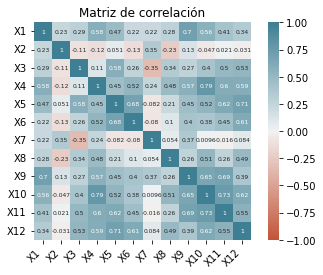

In [33]:
df_sub = df.drop(['Comunidad'], axis=1)
corr = df_sub.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title(f'Matriz de correlación')
plt.show()

## PCA

### Estandarización

Se realiza para evitar problemas con variables con distinta naturaleza y variabilidad. Podemos elegir hacerlo como no, pero las variables con mayores valores de varianza le quitarán peso al resto de las variables, por lo tanto en este caso vamos a realizar la estandarización.

In [38]:
#df_std = (df_sub-df_sub.mean())/df_sub.std()
scaler = StandardScaler().set_output(transform="pandas")
df_std = scaler.fit_transform(df_sub)
df_std

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,-0.211955,-0.056504,0.191919,2.082998,1.244659,1.531690,1.137843,1.153638,1.460204,2.146918e+00,1.510008,1.615704
1,-0.144237,1.539050,-0.667078,-0.750912,0.119479,-0.653410,0.686314,-0.626823,-0.394920,-7.536008e-01,0.335287,-0.473799
2,0.928263,0.817839,-0.345148,0.130057,0.190919,0.248734,-1.578963,0.069337,0.048889,5.004538e-01,0.167949,-0.010511
3,-0.510746,0.700931,0.213173,-0.520577,-0.530061,-0.614232,-1.184352,-0.322968,-1.013147,-7.512369e-01,-0.750858,-0.383360
4,0.795797,0.218478,-1.103056,1.365338,-0.820991,-0.176481,1.961089,2.046470,0.483823,-3.505540e-01,-0.199264,0.186504
5,-0.894185,-0.675625,-1.518298,-0.883535,-0.863291,-1.664731,0.325409,1.095365,-0.845387,-3.452352e-01,-1.421242,-0.849001
6,-0.106814,-0.338073,-0.549918,-0.113346,-0.291301,-0.078274,-0.075880,-0.973341,-0.927048,-9.947197e-01,-1.735517,-0.410592
7,-0.678853,-0.407230,-0.325967,-0.439117,-1.517062,-0.110661,0.980762,-0.875525,0.799815,-6.986399e-01,0.137477,-0.697037
8,-1.191788,-1.711336,-1.205182,-0.615948,-1.407552,-0.901539,-0.294331,-1.109659,-1.759635,-1.148374e+00,-1.505169,-1.866688
9,1.122209,-0.700324,0.040545,1.441596,-0.132441,0.748648,-0.304188,0.940316,0.351123,1.745053e+00,-0.061365,1.052563


### Aplicación de la técnica

In [40]:
# Obtener todas las componentes principales
pca = PCA(n_components=df_sub.shape[1])

pca_features = pca.fit_transform(df_std)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
pca_df['Comunidad'] = df['Comunidad']

En la siguiente tabla vemos la proyección de cada comunidad en cada una de las nuevas variables. Surje de multiplicar, por ejemplo, los valores que tenía Madrid en X1, X2,.., hasta X12 por los valores del vector de PC1.

In [12]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,Comunidad
0,4.120390,-0.509337,0.779304,-1.209691,-0.395478,1.197633,0.154319,0.153357,0.000296,0.261020,-0.582178,0.188804,Madrid
1,-1.158163,-1.245964,-1.177993,0.256449,-0.396793,0.541451,0.253217,-0.024043,-0.700586,-0.147350,0.235793,-0.173910,Andalusia
2,0.554464,0.217157,-0.545693,0.470314,0.630974,-0.655082,1.437137,0.536561,0.006848,0.205480,0.455871,-0.025628,Aragon
3,-1.716402,0.730937,-0.542509,0.647123,-0.253325,-0.163150,0.810539,0.109939,0.253597,-0.288481,0.087283,0.368374,Asturias
4,0.649742,-2.176374,2.159930,-0.236929,-1.056872,-0.368091,-0.160210,0.543487,-0.330628,-0.753048,0.343926,0.058273,Balearic Islands
5,-2.559103,-0.258918,1.912865,0.364069,-0.559392,-0.031070,0.092374,0.136099,-0.710094,0.902624,-0.026819,-0.008945,Canary Islands
6,-1.919865,0.104146,-0.098009,-0.777149,-0.174347,-1.140385,0.076450,-0.550915,0.305784,-0.011427,-0.192204,0.301017,Cantabria
7,-1.284449,-0.895992,0.215005,-0.440169,0.780311,0.809990,-1.271565,0.254148,0.705989,-0.305503,0.147607,-0.022809,Castile and Leon
8,-3.904537,0.738753,1.111262,-0.801013,0.913797,-0.355341,-0.162014,-0.695499,-0.156456,-0.167138,-0.409025,-0.150221,Castile-La Mancha
9,2.253600,0.151822,1.405634,-0.240550,0.194517,-0.677702,0.817672,-0.170668,0.822027,0.273840,-0.044126,-0.270095,Catalonia


### Eigenvectors

Son los valores que conforman los coeficientes de cada una de las nuevas variables.

In [43]:
pca_ev = pd.DataFrame(pca.components_, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'], index=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12'])
pca_ev

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
X1,0.290945,-0.008583,0.243076,0.347445,0.338573,0.277893,0.039392,0.224168,0.328181,0.372874,0.352541,0.347551
X2,-0.296465,-0.455480,0.372142,-0.143855,0.157756,0.168936,-0.610701,0.088904,-0.304042,-0.025106,0.025061,0.132198
X3,-0.051372,-0.516595,-0.226409,0.317907,-0.368648,-0.217907,0.125568,0.569635,-0.036921,0.192056,-0.125849,-0.021026
X4,0.283618,0.240645,0.481233,-0.259431,-0.110484,-0.618955,-0.187874,0.287519,0.065877,0.125570,0.082053,-0.150481
X5,0.184628,-0.312006,-0.151217,0.113953,-0.166676,-0.021839,-0.355454,-0.422697,0.328302,0.194147,0.308389,-0.508779
X6,-0.695762,0.143462,0.012079,-0.056486,-0.185193,-0.173706,0.163611,-0.057625,0.043579,0.218911,0.579619,0.107979
X7,0.034398,0.484641,-0.348730,0.322524,-0.040886,-0.020960,-0.471501,0.039861,-0.426803,0.356711,-0.032819,0.042571
X8,-0.158246,0.285593,-0.117210,-0.242468,-0.175600,0.471677,-0.241423,0.511871,0.395958,-0.131472,-0.007278,-0.270430
X9,0.009688,0.070956,0.328312,0.034447,-0.668015,0.208484,-0.054533,-0.288023,0.170166,0.219541,-0.334233,0.348410
X10,-0.106958,-0.111898,-0.347210,-0.478263,0.291082,-0.179815,-0.086053,-0.052754,0.313797,0.487780,-0.332443,0.229308


In [61]:
sum(pca_ev["PC1"].values * df_std.values[0])

-0.8101753537970857

In [57]:
pca_ev["PC1"].values

array([ 0.29094545, -0.29646547, -0.05137232,  0.28361805,  0.18462773,
       -0.69576156,  0.03439831, -0.15824646,  0.00968793, -0.1069579 ,
        0.26645197, -0.34271478])

In [52]:
df_std.values[0]

array([-0.211955  , -0.05650432,  0.19191885,  2.08299809,  1.24465946,
        1.53169013,  1.13784325,  1.15363827,  1.46020364,  2.14691756,
        1.51000766,  1.61570353])

### Selección del número de componentes principales

In [14]:
# Creamos función para acumular la varianza
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [15]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_, 'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,5.344536,0.445378,0.445378
1,1.840043,0.153337,0.598715
2,1.237029,0.103086,0.701801
3,0.983141,0.081928,0.783729
4,0.781422,0.065119,0.848848
5,0.529459,0.044122,0.892969
6,0.497905,0.041492,0.934461
7,0.283675,0.023640,0.958101
8,0.207049,0.017254,0.975355
9,0.156283,0.013024,0.988379


Vemos gráficamente la varianza acumulada:

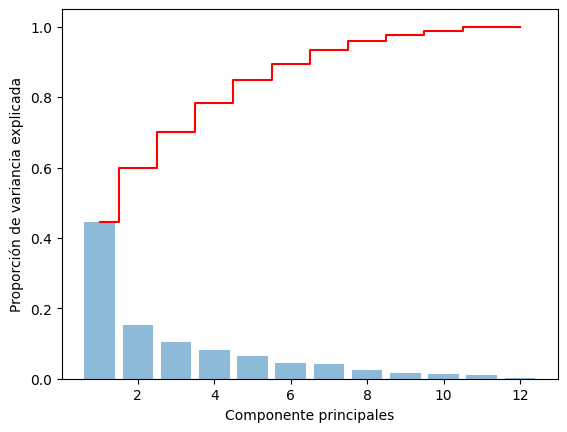

In [16]:
plt.bar(range(1,13), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,13), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

**Criterios de selección:**
* Proporción de variancia acumulada (~75% -80%)​
* Criterio de Kaiser (eigenvalues > 1)​
* Gráfico del codo (Scree)

Las tres primeras componentes acumulan el 70% de la variabilidad total, es decir, están cercanas a cumplir con el primer criterio (>~75%). Además, son las únicas cuyos eigenvalues son superiores a 1 (Criterio de Kaiser).

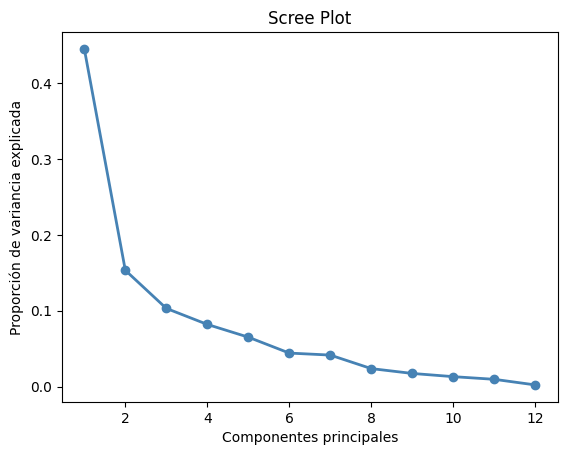

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

Al observar el gráfico del codo, vemos que el quiebre parece producirse entre la segunda y tercera componente. Considerando la primera y la segunda componentes llegaríamos a un ~60% de la variabilidad total, por lo que consideramos óptimo tomar hasta la tercera componente.

### Matriz de correlación de PC seleccionados

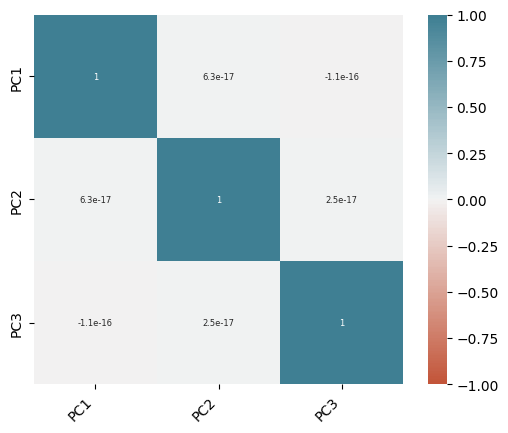

In [ ]:
corr = pca_df[['PC1', 'PC2', 'PC3']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

### Scatter plots

In [ ]:
df.drop(columns=['Comunidad']).columns.to_list()

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12']

In [70]:
features = df.drop(columns=['Comunidad']).columns.to_list()

unique_comunidad = df['Comunidad'].unique()
num_colors = len(unique_comunidad)
color_palette = plt.get_cmap('tab20', num_colors)

comunidad_color_map = {cultivo: mcolors.to_hex(color_palette(i)) for i, cultivo in enumerate(unique_comunidad)}

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter(pca_features, x=0, y=1, color = pca_df["Comunidad"],  
                 labels={'color': 'Comunidad'}, 
                 color_discrete_map=comunidad_color_map,
                 title="Distribución de las comunidades en 2 dimensiones")

fig.show()
fig = px.scatter_3d(pca_features, x=0, y=1, z=2,
              color=pca_df["Comunidad"],  labels={'color': 'Comunidad'},
              color_discrete_map=comunidad_color_map,
              title="Distribución de las comunidades en 2 dimensiones")
fig.show()

##¿Nos agrega valor analizar nuestros datos con isomap, t-sne y umap?

### Isomap

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
isomap_df = Isomap(n_neighbors=6, n_components=3)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter_3d(
    projections_isomap, x=0, y=1, z=2,
    color=df['Comunidad'], labels={'color': 'Comunidad'}
)
fig.update_traces(marker_size=8)
fig.show()

### T-sne

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=3, random_state=0, perplexity=5)
projections_tsne = tsne.fit_transform(df_std, )

fig = px.scatter_3d(
    projections_tsne, x=0, y=1, z=2,
    color=df['Comunidad'], labels={'color': 'Comunidad'}
)
fig.update_traces(marker_size=8)
fig.show()

### UMAP

In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82807 sha256=c447c2e6b6207f6389f78e8388b265ce1b19bc3d19e0779a148240f3961c57c4
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=c628899ef626490e7a736ebef4df9d7ca2d8ede93f8a8a1ecbed294b46342938
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import umap

In [ ]:
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(df_std)
proj_3d = umap_3d.fit_transform(df_std)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df['Comunidad'], labels={'color': 'Comunidad'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df['Comunidad'], labels={'color': 'Comunidad'}
)
fig_3d.update_traces(marker_size=8)

fig_2d.show()
fig_3d.show()